# In Class Activity - Group 4
Members: 
Simon Shrestha (C0913111), Ingrid Guevara (C0919202), Meet patel (C0910378), Tanmay Sharma(C0912911), Aliyu Marafa(C0902760)

### Importing the libraries 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

## Data Extraction

In [2]:
#Import Dataset
data=pd.read_csv("data.csv")

In [3]:
#Show Dataset
data.head()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00215000,07/30/2021,215.0,C,A,224.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0
1,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00215000,07/30/2021,215.0,P,A,0.01,...,-1.0,0,1401,438.97,NaN,0.0,0.0,0.0,0.0,0.0
2,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00220000,07/30/2021,220.0,C,A,219.56,...,-1.0,0,1,438.97,NaN,0.0,0.0,0.0,0.0,0.0
3,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00220000,07/30/2021,220.0,P,A,0.01,...,-1.0,50,328,438.97,NaN,0.0,0.0,0.0,0.0,0.0
4,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00225000,07/30/2021,225.0,C,A,214.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0


## Data Validation and Cleaning

In [4]:
#Detailed information display
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221046 entries, 0 to 221045
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   symbol              221046 non-null  object 
 1   exchange            221046 non-null  object 
 2   date                221046 non-null  object 
 3   adjusted close      221046 non-null  float64
 4   option symbol       221046 non-null  object 
 5   expiration          221046 non-null  object 
 6   strike              221046 non-null  float64
 7   call/put            221046 non-null  object 
 8   style               221046 non-null  object 
 9   ask                 221046 non-null  float64
 10  bid                 221046 non-null  float64
 11  mean price          221046 non-null  float64
 12  iv                  221046 non-null  float64
 13  volume              221046 non-null  int64  
 14  open interest       221046 non-null  int64  
 15  stock price for iv  221046 non-nul

In [5]:
#Features
data.columns

Index(['symbol', 'exchange', 'date', 'adjusted close', 'option symbol',
       'expiration', 'strike', 'call/put', 'style', 'ask', 'bid', 'mean price',
       'iv', 'volume', 'open interest', 'stock price for iv', '*', 'delta',
       'vega', 'gamma', 'theta', 'rho'],
      dtype='object')

In [6]:
#Show the data types of each feature
data.dtypes

symbol                 object
exchange               object
date                   object
adjusted close        float64
option symbol          object
expiration             object
strike                float64
call/put               object
style                  object
ask                   float64
bid                   float64
mean price            float64
iv                    float64
volume                  int64
open interest           int64
stock price for iv    float64
*                      object
delta                 float64
vega                  float64
gamma                 float64
theta                 float64
rho                   float64
dtype: object

In [7]:
#Describe in detail each feature
data.describe()

,adjusted close,strike,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
count,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000
mean,435.089149,398.702076,41.667365,40.967420,41.315752,0.234593,405.715661,1660.743542,434.966436,0.102498,0.503011,0.005594,-0.042474,-0.067521
std,3.863763,93.725546,60.504762,59.876656,60.189057,0.225324,5100.355521,6040.663628,3.837734,0.614277,0.544469,0.009183,0.040318,1.726706
min,424.970000,25.000000,0.010000,0.000000,0.000000,-1.000000,0.000000,0.000000,425.020000,-1.000000,0.000000,0.000000,-0.779877,-15.741297
25%,432.930000,349.000000,1.660000,1.500000,1.600000,0.139646,0.000000,1.000000,432.520000,-0.240680,0.061539,0.000718,-0.056856,-0.143418
50%,435.460000,411.000000,15.910000,15.440000,15.650000,0.206940,0.000000,100.000000,435.440000,0.000000,0.293737,0.002824,-0.035767,0.000000
75%,438.510000,454.000000,52.550000,51.550000,52.040000,0.306208,19.000000,918.000000,438.140000,0.731058,0.817714,0.006464,-0.014486,0.334990
max,441.020000,655.000000,416.890000,415.230000,416.060000,1.805012,446333.000000,169905.000000,441.050000,1.000000,2.674587,0.185555,0.000000,5.584008


In [8]:
#Allows to display the sum of null data found
data.isnull().sum()

symbol                     0
exchange                   0
date                       0
adjusted close             0
option symbol              0
expiration                 0
strike                     0
call/put                   0
style                      0
ask                        0
bid                        0
mean price                 0
iv                         0
volume                     0
open interest              0
stock price for iv         0
*                     192007
delta                      0
vega                       0
gamma                      0
theta                      0
rho                        0
dtype: int64

In [9]:
#Detail the general characteristics of the dataset
print(data.size)
print(data.ndim)
print(data.shape)

4863012
2
(221046, 22)


In [10]:
#Shows the amount of unique data in each feature
data.nunique()

symbol                     1
exchange                   1
date                      21
adjusted close            21
option symbol          13960
expiration                48
strike                   312
call/put                   2
style                      1
ask                    22926
bid                    22611
mean price             36172
iv                    146910
volume                  6205
open interest          14825
stock price for iv        21
*                          1
delta                 182814
vega                  179397
gamma                  28374
theta                  91796
rho                   183742
dtype: int64

In [11]:
# col_drop=['symbol','exchange','style','*']
# data=data.drop(columns=col_drop)
# data.head()

## Data Aggregation and Representation

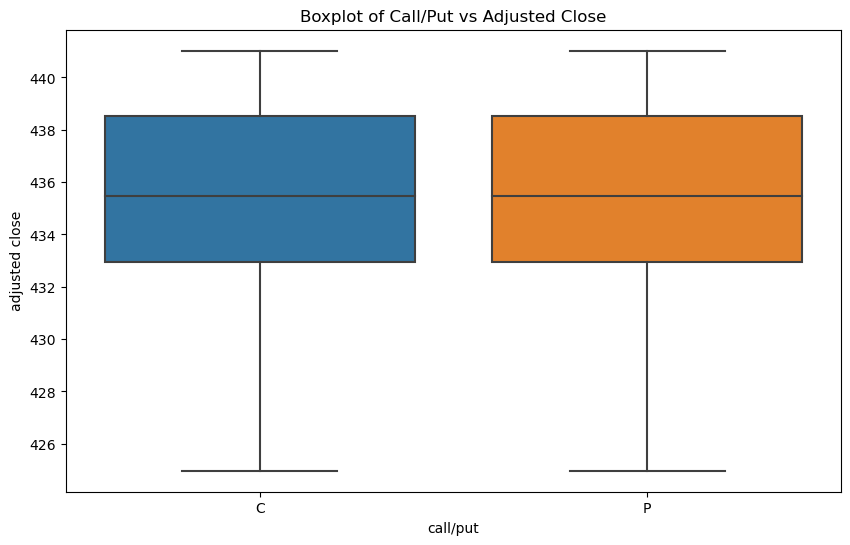

In [12]:
# Boxplot for 'call/put' vs 'adjusted close'

plt.figure(figsize=(10, 6))
sns.boxplot(x='call/put', y='adjusted close', data=data)
plt.title('Boxplot of Call/Put vs Adjusted Close')
plt.show()

## Data Analysis

In [13]:
#Transform the data type of Call/put from objects to booleans
data['call/put'] = data['call/put'].replace({'P': True , 'C': False})
data.head()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00215000,07/30/2021,215.0,False,A,224.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0
1,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00215000,07/30/2021,215.0,True,A,0.01,...,-1.0,0,1401,438.97,NaN,0.0,0.0,0.0,0.0,0.0
2,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00220000,07/30/2021,220.0,False,A,219.56,...,-1.0,0,1,438.97,NaN,0.0,0.0,0.0,0.0,0.0
3,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00220000,07/30/2021,220.0,True,A,0.01,...,-1.0,50,328,438.97,NaN,0.0,0.0,0.0,0.0,0.0
4,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00225000,07/30/2021,225.0,False,A,214.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0


In [14]:
#Verify the correlation between the feature of the dataset
co=data.corr(numeric_only=True)
co

,adjusted close,strike,call/put,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
adjusted close,1.000000e+00,1.649019e-02,5.401445e-18,0.002918,0.002511,0.002721,-0.003073,-0.008051,0.008685,9.962428e-01,0.017865,-0.001789,0.002520,0.030250,0.008098
strike,1.649019e-02,1.000000e+00,1.673672e-19,-0.319156,-0.322220,-0.320711,-0.574573,0.023565,-0.058686,1.694161e-02,-0.472470,0.128154,0.197369,-0.078016,-0.378695
call/put,5.401445e-18,1.673672e-19,1.000000e+00,-0.290714,-0.292705,-0.291701,-0.031213,0.009143,0.096228,7.447260e-18,-0.794320,-0.008008,0.002061,-0.040209,-0.491496
ask,2.918389e-03,-3.191557e-01,-2.907143e-01,1.000000,0.999817,0.999953,0.373107,-0.051920,-0.146613,2.873059e-03,0.335986,-0.010311,-0.251779,0.234647,-0.016752
bid,2.511475e-03,-3.222205e-01,-2.927050e-01,0.999817,1.000000,0.999954,0.376161,-0.051600,-0.145546,2.505483e-03,0.339313,-0.019067,-0.250529,0.232326,-0.013440
mean price,2.720523e-03,-3.207113e-01,-2.917014e-01,0.999953,0.999954,1.000000,0.374645,-0.051761,-0.146081,2.695349e-03,0.337654,-0.014654,-0.251149,0.233473,-0.015107
iv,-3.072735e-03,-5.745733e-01,-3.121342e-02,0.373107,0.376161,0.374645,1.000000,-0.126601,-0.001707,-4.614260e-03,0.323266,-0.106163,-0.202550,0.068170,0.125040
volume,-8.050872e-03,2.356461e-02,9.142804e-03,-0.051920,-0.051600,-0.051761,-0.126601,1.000000,0.185569,-8.141536e-03,-0.012911,-0.049532,0.278318,-0.226557,0.002718
open interest,8.684639e-03,-5.868596e-02,9.622847e-02,-0.146613,-0.145546,-0.146081,-0.001707,0.185569,1.000000,8.776850e-03,-0.017046,-0.051157,0.082769,-0.120480,0.021480
stock price for iv,9.962428e-01,1.694161e-02,7.447260e-18,0.002873,0.002505,0.002695,-0.004614,-0.008142,0.008777,1.000000e+00,0.017548,-0.002040,0.002175,0.030413,0.007912


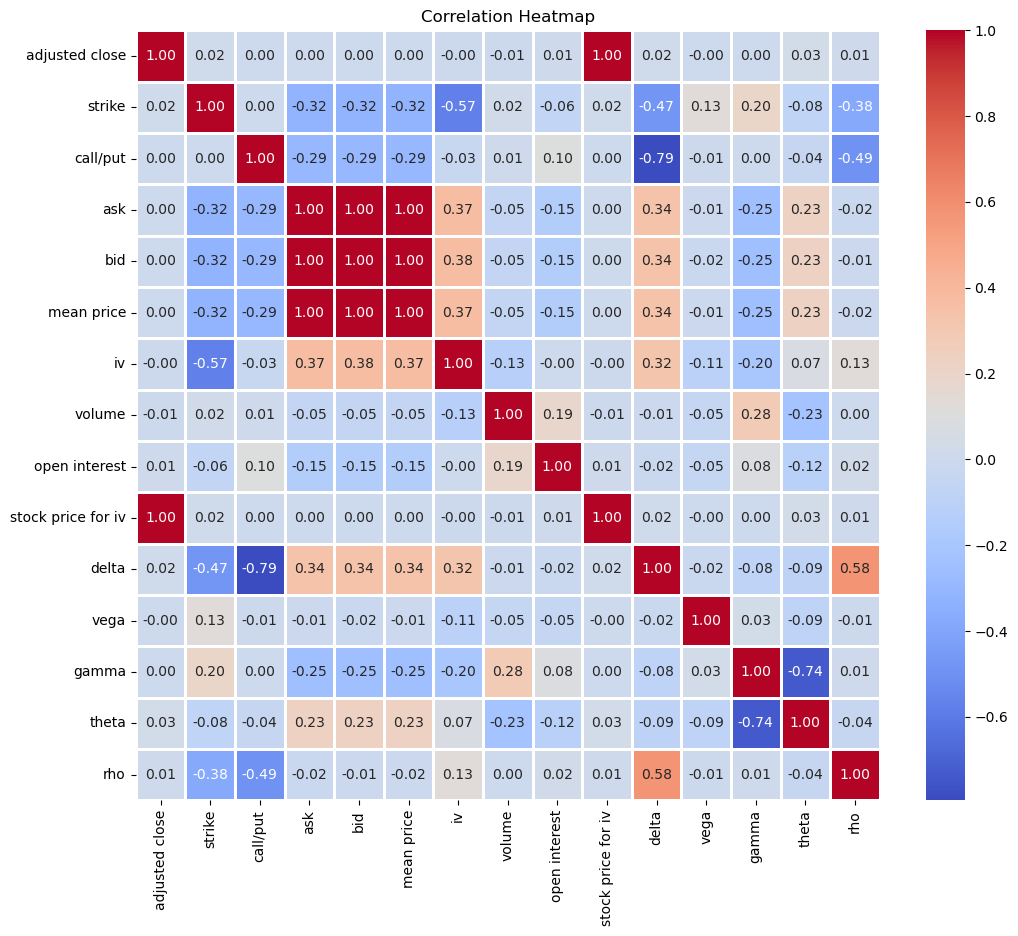

In [15]:
# Correlation heatmap to identify relationships between numerical features
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

## Data Visualization

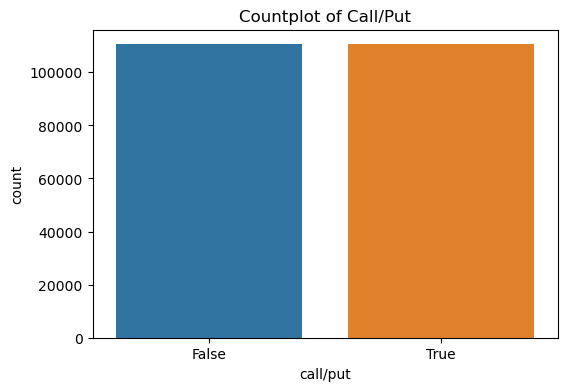

In [16]:
# Countplot for 'call/put'
plt.figure(figsize=(6, 4))
sns.countplot(x='call/put', data=data)
plt.title('Countplot of Call/Put')
plt.show()

<Axes: xlabel='call/put', ylabel='delta'>

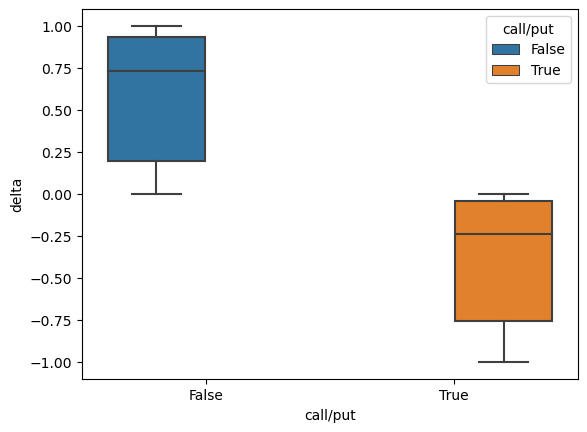

In [17]:
# Boxplot for 'call/put' vs 'delta'
sns.boxplot(data,x='call/put',y='delta',hue='call/put')

<Axes: xlabel='call/put', ylabel='mean price'>

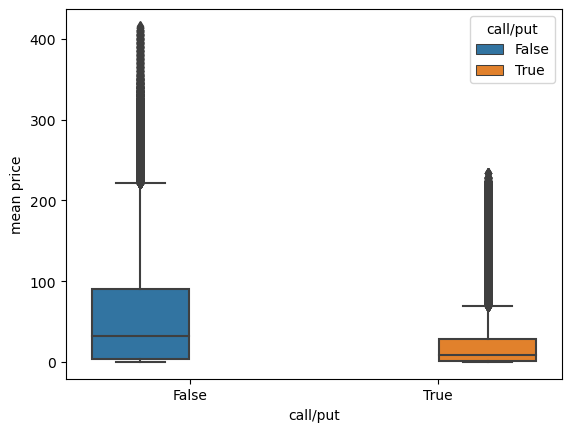

In [18]:
# Boxplot for 'call/put' vs 'mean price'
sns.boxplot(data=data,x='call/put',y='mean price',hue='call/put')

<Axes: xlabel='call/put', ylabel='rho'>

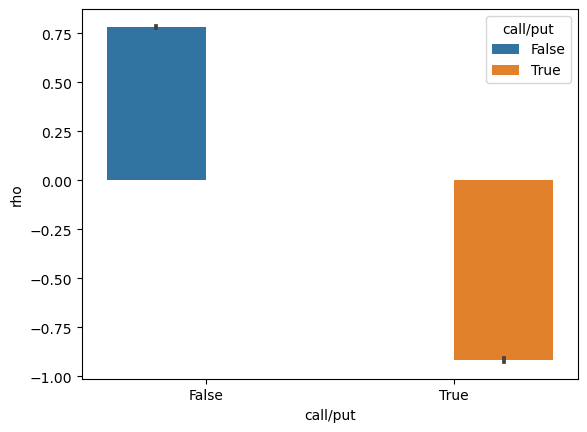

In [19]:
# Barplot for 'call/put' vs 'rho'
sns.barplot(data=data,x='call/put',y='rho',hue='call/put')

<Axes: xlabel='call/put', ylabel='rho'>

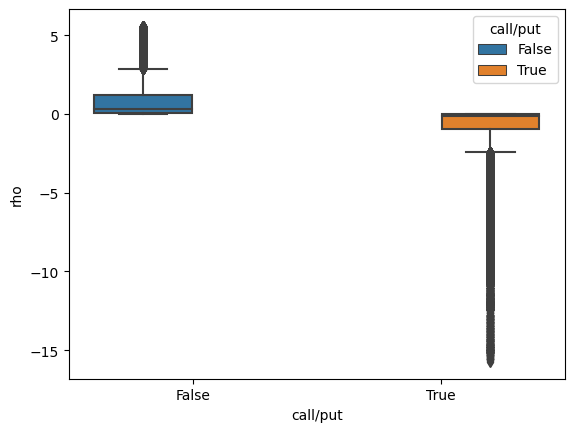

In [20]:
# Boxplot for 'call/put' vs 'rho'
sns.boxplot(data=data,x='call/put',y='rho',hue='call/put')

## Utilization of Analysis Results

In [258]:
#Feature selection and preparation
filtered_data = data[['date','adjusted close', 'strike', 'call/put', 'ask', 'bid', 'mean price',
       'iv', 'volume', 'open interest', 'stock price for iv', 'delta',
       'vega', 'gamma', 'theta', 'rho']]

In [259]:
#Selection of the date defined data
filtered_train = filtered_data[filtered_data['date'] != '07/30/2021']
filtered_test = filtered_data[filtered_data['date'] == '07/30/2021']

In [260]:
features = ['adjusted close', 'strike', 'ask', 'bid', 'mean price',
       'iv', 'volume', 'open interest', 'stock price for iv', 'delta',
       'vega', 'gamma', 'theta', 'rho']
target = 'call/put'

X_train = filtered_train[features]
X_test = filtered_test[features]

y_train = filtered_train[target]
y_test = filtered_test[target]

In [108]:
log=LogisticRegression()

In [109]:
log.fit(X_train, y_train)

C:\Users\91951\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
# Make predictions on the test set
y_pred = log.predict(X_test)

In [111]:
# Calculate the accuracy between the data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [112]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99      5363
        True       0.99      0.99      0.99      5363

    accuracy                           0.99     10726
   macro avg       0.99      0.99      0.99     10726
weighted avg       0.99      0.99      0.99     10726



In [113]:
#Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[5307   56]
 [  49 5314]]


In [114]:
data.head()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho,date_difference
0,SPY,NYSEArca,2021-07-30,438.51,SPY 210730C00215000,2021-07-30,215.0,False,A,224.56,...,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,SPY,NYSEArca,2021-07-30,438.51,SPY 210730P00215000,2021-07-30,215.0,True,A,0.01,...,0,1401,438.97,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,SPY,NYSEArca,2021-07-30,438.51,SPY 210730C00220000,2021-07-30,220.0,False,A,219.56,...,0,1,438.97,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,SPY,NYSEArca,2021-07-30,438.51,SPY 210730P00220000,2021-07-30,220.0,True,A,0.01,...,50,328,438.97,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,SPY,NYSEArca,2021-07-30,438.51,SPY 210730C00225000,2021-07-30,225.0,False,A,214.56,...,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0,0.0


## scaling


In [115]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_standardized_data = scaler.fit_transform(X_train)
X_test_standardized_data = scaler.fit_transform(X_test)


In [116]:
X_train_standardized_data

array([[ 1.47776493, -1.95739648,  3.03699177, ..., -0.60879907,
         1.04791922,  0.04256736],
       [ 1.47776493, -1.95739648, -0.6887474 , ..., -0.60879907,
         1.04791922,  0.03916043],
       [ 1.47776493, -1.90406338,  2.95436282, ..., -0.60879907,
         1.04791922,  0.04264661],
       ...,
       [-1.1555294 ,  2.52258415,  2.80629175, ..., -0.4943648 ,
         0.78142759, -8.64540815],
       [-1.1555294 ,  2.57591725, -0.64379725, ..., -0.50045058,
         0.91909353,  0.30753484],
       [-1.1555294 ,  2.57591725,  2.8889207 , ..., -0.50045058,
         0.78945296, -8.73502555]])

In [117]:
log.fit(X_train_standardized_data, y_train)

C:\Users\91951\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [118]:
# Make predictions on the test set
y_pred = log.predict(X_test_standardized_data)

In [119]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [120]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      5363
        True       1.00      0.99      0.99      5363

    accuracy                           0.99     10726
   macro avg       1.00      0.99      0.99     10726
weighted avg       1.00      0.99      0.99     10726



In [121]:
#Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[5362    1]
 [  53 5310]]


## adding the feature 

In [122]:
data.head()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho,date_difference
0,SPY,NYSEArca,2021-07-30,438.51,SPY 210730C00215000,2021-07-30,215.0,False,A,224.56,...,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,SPY,NYSEArca,2021-07-30,438.51,SPY 210730P00215000,2021-07-30,215.0,True,A,0.01,...,0,1401,438.97,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,SPY,NYSEArca,2021-07-30,438.51,SPY 210730C00220000,2021-07-30,220.0,False,A,219.56,...,0,1,438.97,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,SPY,NYSEArca,2021-07-30,438.51,SPY 210730P00220000,2021-07-30,220.0,True,A,0.01,...,50,328,438.97,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,SPY,NYSEArca,2021-07-30,438.51,SPY 210730C00225000,2021-07-30,225.0,False,A,214.56,...,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
data.columns

Index(['symbol', 'exchange', 'date', 'adjusted close', 'option symbol',
       'expiration', 'strike', 'call/put', 'style', 'ask', 'bid', 'mean price',
       'iv', 'volume', 'open interest', 'stock price for iv', '*', 'delta',
       'vega', 'gamma', 'theta', 'rho', 'date_difference'],
      dtype='object')

In [124]:
data['adjusted close'].describe()

count    221046.000000
mean        435.089149
std           3.863763
min         424.970000
25%         432.930000
50%         435.460000
75%         438.510000
max         441.020000
Name: adjusted close, dtype: float64

In [136]:
from datetime import datetime
date_format = '%m/%d%Y'
data['date'] = pd.to_datetime(data['date'], format=date_format)
data['expiration'] = pd.to_datetime(data['expiration'], format=date_format)
data['date_difference'] = (data['expiration'] - data['date']).dt.days

In [137]:
data['date_difference'].describe()

count    221046.000000
mean        163.923301
std         196.728419
min           0.000000
25%          22.000000
50%          84.000000
75%         231.000000
max         897.000000
Name: date_difference, dtype: float64

In [138]:
data.head()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho,date_difference
0,SPY,NYSEArca,2021-07-30,438.51,SPY 210730C00215000,2021-07-30,215.0,False,A,224.56,...,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0,0
1,SPY,NYSEArca,2021-07-30,438.51,SPY 210730P00215000,2021-07-30,215.0,True,A,0.01,...,0,1401,438.97,NaN,0.0,0.0,0.0,0.0,0.0,0
2,SPY,NYSEArca,2021-07-30,438.51,SPY 210730C00220000,2021-07-30,220.0,False,A,219.56,...,0,1,438.97,NaN,0.0,0.0,0.0,0.0,0.0,0
3,SPY,NYSEArca,2021-07-30,438.51,SPY 210730P00220000,2021-07-30,220.0,True,A,0.01,...,50,328,438.97,NaN,0.0,0.0,0.0,0.0,0.0,0
4,SPY,NYSEArca,2021-07-30,438.51,SPY 210730C00225000,2021-07-30,225.0,False,A,214.56,...,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0,0


In [139]:
data.columns

Index(['symbol', 'exchange', 'date', 'adjusted close', 'option symbol',
       'expiration', 'strike', 'call/put', 'style', 'ask', 'bid', 'mean price',
       'iv', 'volume', 'open interest', 'stock price for iv', '*', 'delta',
       'vega', 'gamma', 'theta', 'rho', 'date_difference'],
      dtype='object')

In [140]:
filtered_data = data[['date','adjusted close', 'strike', 'call/put', 'ask', 'bid', 'mean price',
       'iv', 'volume', 'open interest', 'stock price for iv', 'delta',
       'vega', 'gamma', 'theta', 'rho','date_difference']]

In [141]:
#Selection of the date defined data
filtered_train = filtered_data[filtered_data['date'] != '07/30/2021']
filtered_test = filtered_data[filtered_data['date'] == '07/30/2021']

In [193]:
features = ['adjusted close', 'strike', 'ask', 'bid', 'mean price',
       'iv', 'volume', 'open interest', 'stock price for iv', 'delta',
       'vega', 'gamma', 'theta', 'rho','date_difference']
target = 'call/put'

X_train = filtered_train[features]
X_test = filtered_test[features]

y_train = filtered_train[target]
y_test = filtered_test[target]

In [194]:
loggistic=LogisticRegression()

In [195]:
loggistic.fit(X_train, y_train)

C:\Users\91951\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [196]:
# Make predictions on the test set
y_pred = loggistic.predict(X_test)

In [197]:
# Calculate the accuracy between the data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [198]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99      5363
        True       0.99      0.99      0.99      5363

    accuracy                           0.99     10726
   macro avg       0.99      0.99      0.99     10726
weighted avg       0.99      0.99      0.99     10726



In [199]:
#Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[5317   46]
 [  46 5317]]


## pca

In [200]:
from sklearn.decomposition import PCA

In [245]:
# filtered_data = data[['date','adjusted close', 'strike', 'call/put', 'ask', 'bid', 'mean price',
#        'iv', 'volume', 'open interest', 'stock price for iv', 'delta',
#        'vega', 'gamma', 'theta', 'rho','date_difference']]

In [255]:
# features = ['adjusted close', 'strike', 'ask', 'bid', 'mean price',
#        'iv', 'volume', 'open interest', 'stock price for iv', 'delta',
#        'vega', 'gamma', 'theta', 'rho','date_difference']
# target = 'call/put'

In [256]:
# X = data[features]
# Y = data['call/put']

In [257]:
# Example: Standardize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [ ]:
# X_train=X

In [276]:
X_train_standardized_data = scaler.fit_transform(X_train)
X_test_standardized_data = scaler.fit_transform(X_test)
print(X_test_standardized_data.shape)
print(X_train_standardized_data.shape)

(10726, 14)
(210320, 14)


In [286]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components1 = np.argmax(cumulative_variance_ratio >= 0.90) + 1
print(n_components1)

7


In [303]:
# target_explained_variance_ratio = 0.9  
pca = PCA(n_components=7)
features_pca = pca.fit_transform(X_train_standardized_data)
features_pca_test = pca.fit_transform(X_test_standardized_data)

In [304]:
print(features_pca.shape)
print(features_pca_test.shape)
features_pca[:2]
features_pca_test[:2]

(210320, 7)
(10726, 7)


array([[ 4.02624514, -2.13661345,  1.00093515,  1.89070642,  2.03204816,
        -2.11345191, -2.44883663],
       [-1.3084883 , -0.88528956, -1.86884888,  1.21950506,  1.51125388,
        -1.6154185 , -1.29234856]])

In [305]:
# Train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(features_pca, y_train)

LogisticRegression()

In [306]:
# Make predictions
y_pred = logreg.predict(features_pca_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.3098079433153086


In [307]:
#Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[2309 3054]
 [4349 1014]]


## different method

In [230]:
# Separate features and target
features = data.drop('call/put', axis=1)
target = data['call/put']

In [231]:
# Exclude non-numeric columns
numeric_features = features.select_dtypes(include=['float64', 'int64'])

In [232]:
# Standardize the data
scaler = StandardScaler()
features_standardized = scaler.fit_transform(numeric_features)

In [237]:
# Apply PCA with a target explained variance ratio
target_explained_variance_ratio = 0.9  
pca = PCA(n_components=target_explained_variance_ratio)
features_pca = pca.fit_transform(features_standardized)

In [238]:
# Print the number of components selected
print(f"Number of components selected to retain {target_explained_variance_ratio * 100}% variance: {pca.n_components_}")

Number of components selected to retain 90.0% variance: 8


In [239]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_pca, target, test_size=0.2, random_state=42)

In [240]:
# Train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [241]:
# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9855914951368469


## new begining for pca 